# Overview

This notebook focuses on **fine-tuning** a **MobileNet** model on the **Food-101** dataset, with an emphasis on **optimising model performance** under **hardware constraints**, particularly a CPU bottleneck. Due to these limitations, we conducted our experiments using a subset of the training data (10%) for both model training and hyperparameter optimization.

To identify the most effective fine-tuning strategy, we experimented with two different approaches: **single-stage fine-tuning** and **two-stage fine-tuning**. The idea behind the two-stage fine-tuning approach is that initially training only the classifier (i.e., the final Fully-Connected layer) with a higher learning rate would allow the newly added layer to adapt quickly to the Food-101 dataset. Subsequently, a lower learning rate could be employed to fine-tune the entire network, enabling more nuanced adjustments to the pre-trained layers. In theory, this method would yield superior performance compared to a single-stage approach, where the entire network is fine-tuned using a uniform learning rate from the outset. 

We prioritised optimising and evaluating performance using validation accuracy. This metric was chosen for its practicality, interpretability, and the balanced nature of the dataset, making it a reliable metric for assessing how well the model generalises to unseen data.

Our notebook is structured as follows:

1. **Single-Stage Fine-Tuning:** We began our first experiment by fine-tuning the MobileNet model without freezing any layers, performing a coarse hyperparameter search to identify the optimal learning rate. After establishing this learning rate, we used it to train the model for a higher number of epochs and evaluated its performance.

2.  **Two-Stage Fine-Tuning (Part I):** In our second experiment, we adopted a two-stage fine-tuning approach. First, we froze all layers except the final Fully-Connected layer and conducted a coarse hyperparameter search to optimise the learning rate specifically for this layer. Following this, we trained the FC layer for several epochs, saving the weights from the best-performing epoch.

3. **Two-Stage Fine-Tuning (Part II):** Next, we unfroze all layers of the MobileNet model and conducted a coarse search for optimal learning rates to fine-tune the entire network. We extended the training duration to evaluate model performance at different learning rates and determine the best approach.

4. **Final Model Training:** Based on the findings from our experiments, we employed a single-stage fine-tuning approach for our final model training on the full dataset, allowing for a larger number of epochs to facilitate convergence.

5. **Evaluation:** Finally, we evaluated the trained model on a separate test dataset to assess its overall performance and generalization capabilities.

6. **Exploration:** To conclude, we've conducted a deep dive to explore and summarise the model's classification results. 

## Single-Stage Fine-Tuning: LR-tuning
In our first experiment with the MobileNet model, we fine-tuned it on the Food-101 dataset without freezing any layers. To determine the optimal learning rate, we performed a coarse hyperparameter search and evaluated model performance after 10 epochs. A learning rate (LR) of **1e-4** yielded the best validation accuracy of **65.0%** at epoch 9.

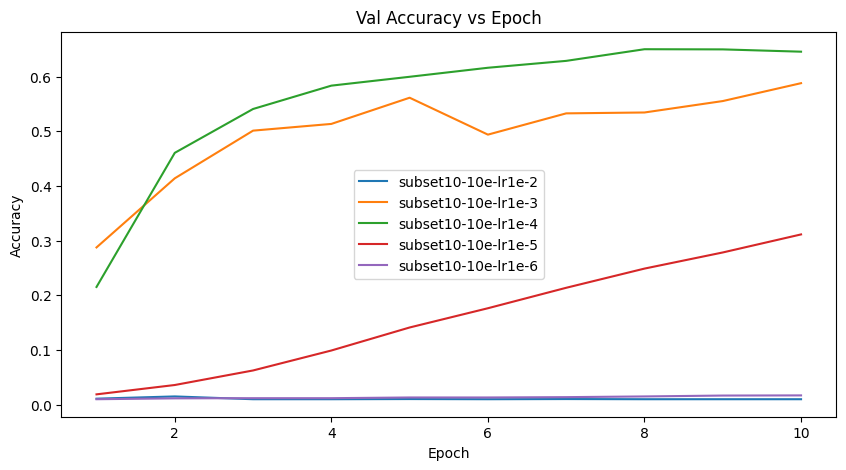

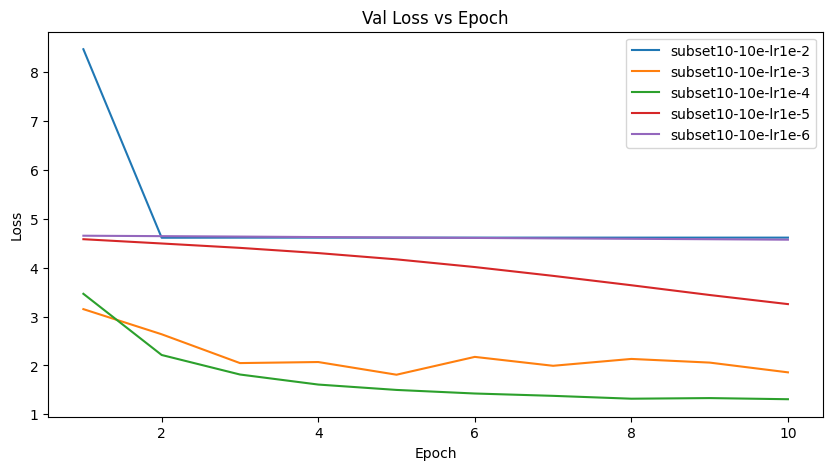

In [8]:
from src.vis_utils import compare_plots
base_dir = 'results/single-stage/single-stage-hpo'
sub_dirs = [
    # 'subset10-10e-lr1e-1', # Excluded due to poor performance affecting chart scale.
    'subset10-10e-lr1e-2',
    'subset10-10e-lr1e-3',
    'subset10-10e-lr1e-4',
    'subset10-10e-lr1e-5',
    'subset10-10e-lr1e-6',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Single-Stage Fine-Tuning: Model Evaluation
We use the optimal learning rate identified previously (1e-4) to train our model for 100 epochs. We save the weights of the model with the highest validation accuracy, which achieved **67.33%** at epoch 31.

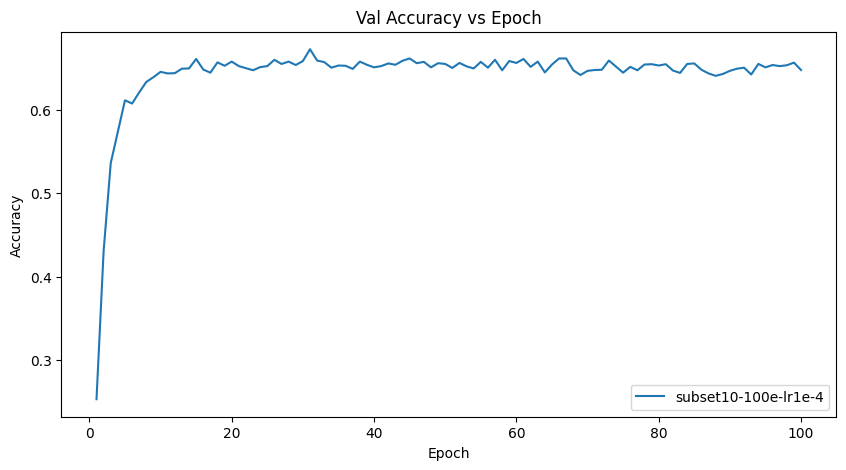

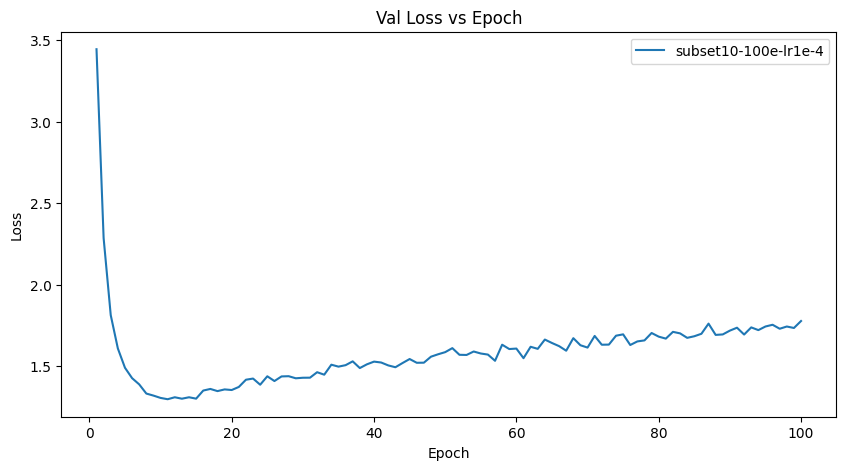

In [18]:
base_dir = 'results/single-stage'
sub_dirs = [
    'subset10-100e-lr1e-4'
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part I): LR-tuning on the FC layer
For our second experiment, we adopted a two-stage fine-tuning approach, starting by freezing all layers except the newly added final Fully-Connected (FC) layer. We conducted another coarse hyperparameter search to identify the optimal learning rate for the FC layer, with **1e-3** emerging as the best option, achieving **53.0%** validation accuracy at epoch 10. 

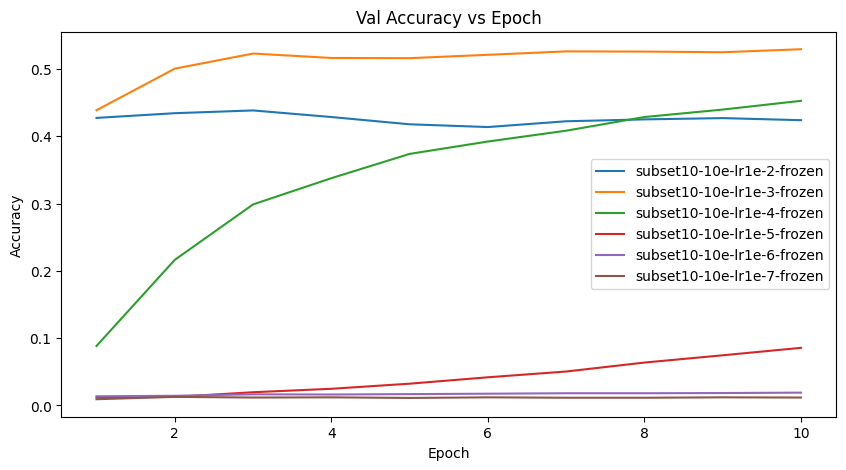

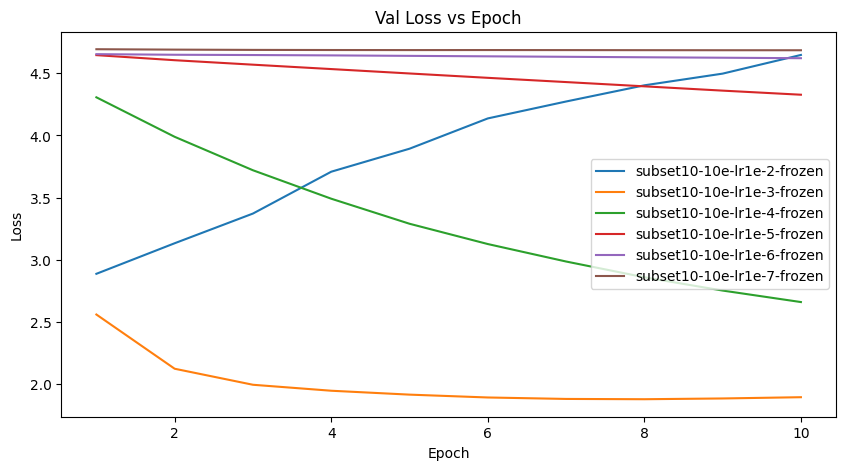

In [25]:
base_dir = 'results/two-stage/1-frozen/frozen-hpo'
sub_dirs = [
    # 'subset10-10e-lr1e-0-frozen', # Excluded due to poor performance affecting chart scale.
    # 'subset10-10e-lr1e-1-frozen', # Excluded due to poor performance affecting chart scale.
    'subset10-10e-lr1e-2-frozen',
    'subset10-10e-lr1e-3-frozen',
    'subset10-10e-lr1e-4-frozen',
    'subset10-10e-lr1e-5-frozen',
    'subset10-10e-lr1e-6-frozen',
    'subset10-10e-lr1e-7-frozen',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part I): Training the FC layer
We use the optimal learning rate identified previously (1e-3) to train the FC layer for 50 epochs, saving the weights from the epoch that recorded the highest validation accuracy. Training only the final FC layer, our model achieves a validation accuracy of **52.6%** at **epoch 12**.

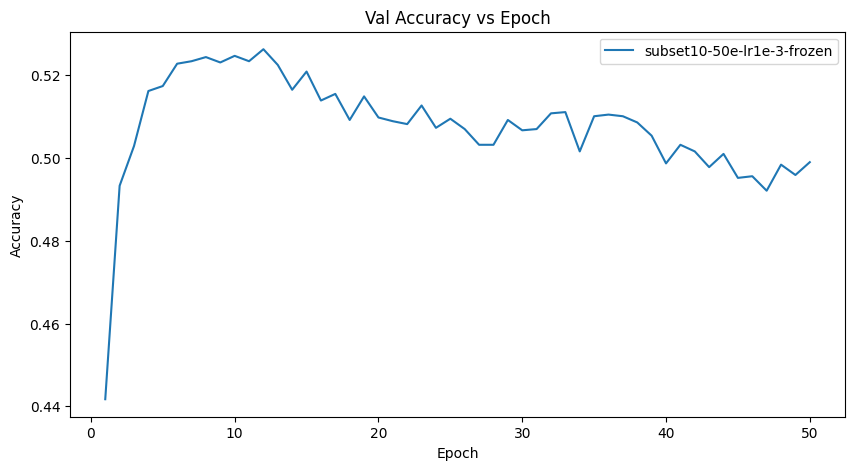

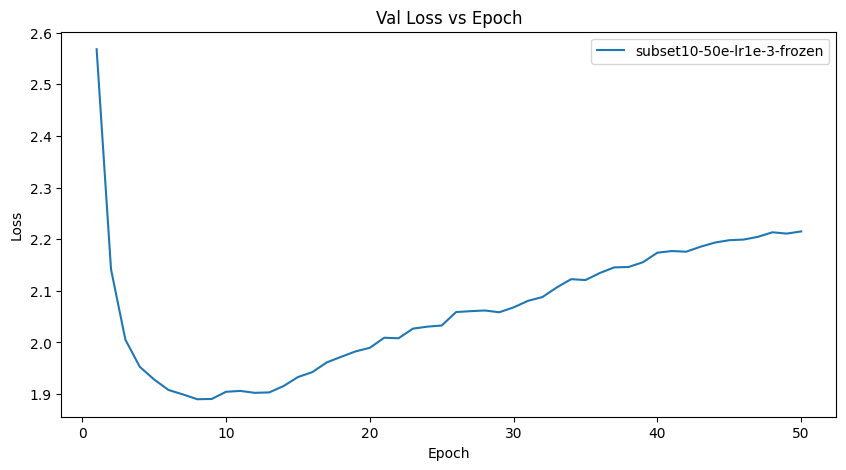

In [19]:
base_dir = 'results/two-stage/1-frozen'
sub_dirs = [
    'subset10-50e-lr1e-3-frozen'
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part II): LR-tuning on the entire network
Next, we unfroze all layers of the MobileNet model to fine-tune the entire network at a lower learning rate. We evaluated a wide range of learning rates, and determined that **1e-4** and **1e-5** are the best-performing learning rates.

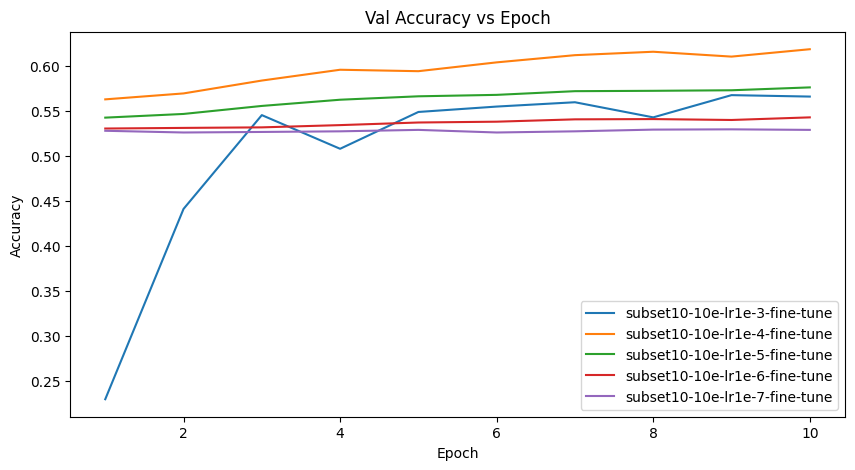

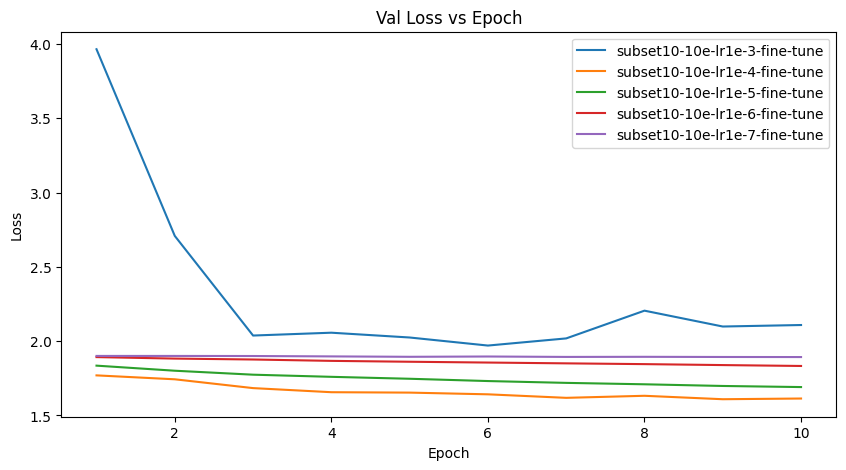

In [32]:
base_dir = 'results/two-stage/2-fine-tune/fine-tune-hpo'
sub_dirs = [
    # 'subset10-10e-lr1e-1-fine-tune', # Excluded due to poor performance affecting chart scale.
    # 'subset10-10e-lr1e-2-fine-tune', # Excluded due to poor performance affecting chart scale.
    'subset10-10e-lr1e-3-fine-tune',
    'subset10-10e-lr1e-4-fine-tune',
    'subset10-10e-lr1e-5-fine-tune',
    'subset10-10e-lr1e-6-fine-tune',
    'subset10-10e-lr1e-7-fine-tune',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part II): Validating LRs on the entire network
To identify which is our optimal learning rate, we extend the number of epochs for training to 30 before evaluating performance on our validation set. At epoch 30, the model trained with **1e-4** achieved a validation accuracy of **63.9%**, while the model trained with **1e-5** reached **60.2%**. Although 1e-4 appeared to perform better than 1e-5, the accuracy and loss charts suggested 1e-5 was learning at a more stable rate and 1e-4 was beginning to plateau in performance.

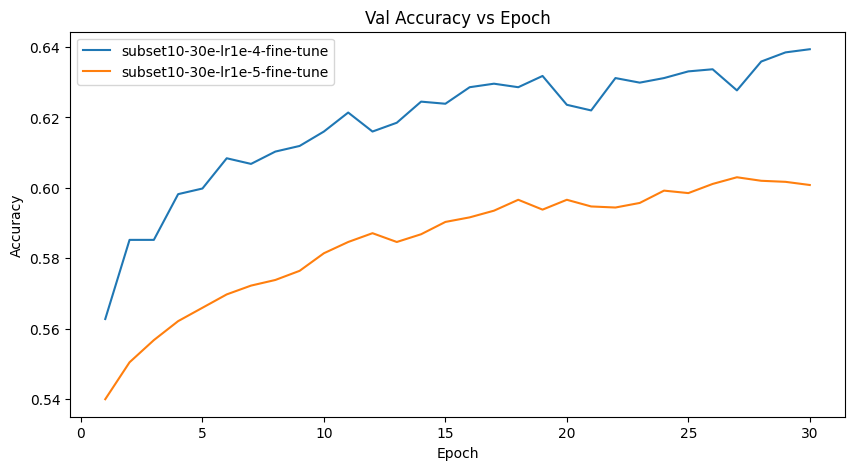

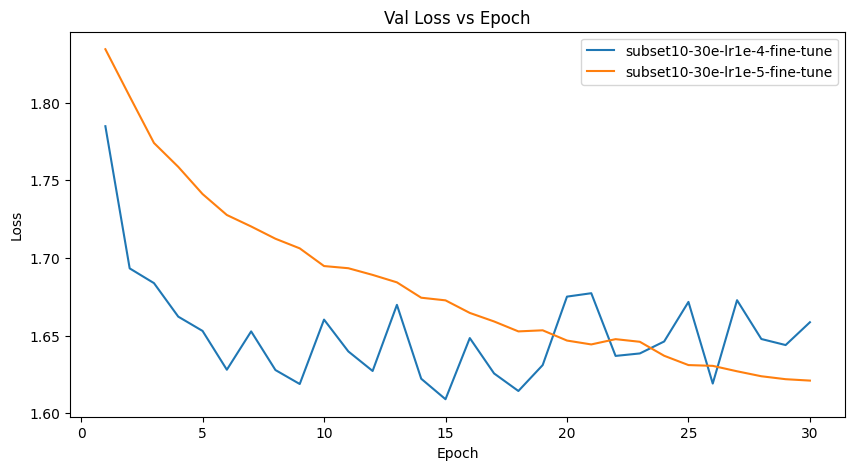

In [33]:
base_dir = 'results/two-stage/2-fine-tune/fine-tune-hpo'
sub_dirs = [
    'subset10-30e-lr1e-4-fine-tune',
    'subset10-30e-lr1e-5-fine-tune',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part II): Training the entire network
To properly evaluate both models, we extended the training to completion, up to 100-150 epochs. The results showed that both models plateaued at **63.9%** validation accuracy, with **1e-4** achieving this at **epoch 44** and **1e-5** at **epoch 136**.

This indicates that both models have **underperformed** compared to the **single-stage fine-tuning** approach, potentially as a result of **overfitting** during our first stage of fine-tuning (i.e. on the classifier).

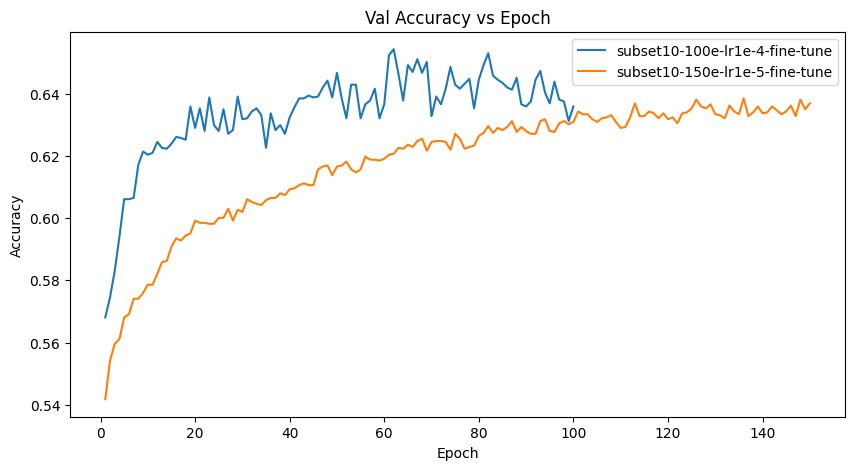

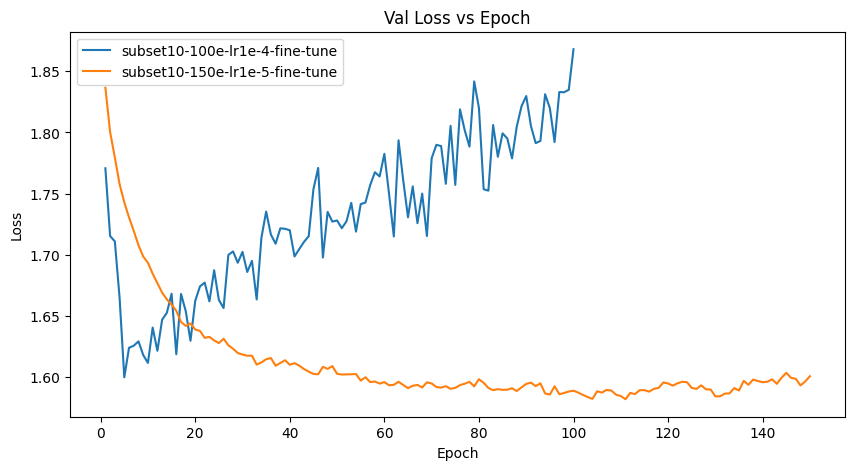

In [21]:
base_dir = 'results/two-stage/2-fine-tune'
sub_dirs = [
    'subset10-100e-lr1e-4-fine-tune',
    'subset10-150e-lr1e-5-fine-tune',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Two-Stage Fine-Tuning (Part II): Training the entire network (Attempt 2)
To address **potential overfitting**, we load an earlier checkpoint from when we were training the FC layer with a LR of 1e-3, specifically **epoch 6** (instead of 12). We choose this point as it's before performance begins to plateau (and also before we achieve peak validation accuracy on the FC layer).

This led to improvements when fine-tuning the entire network, with **1e-4** achieving a validation accuracy of **66.1%** at **epoch 84** and 1e-5 reaching **65.7%** at **epoch 189**.

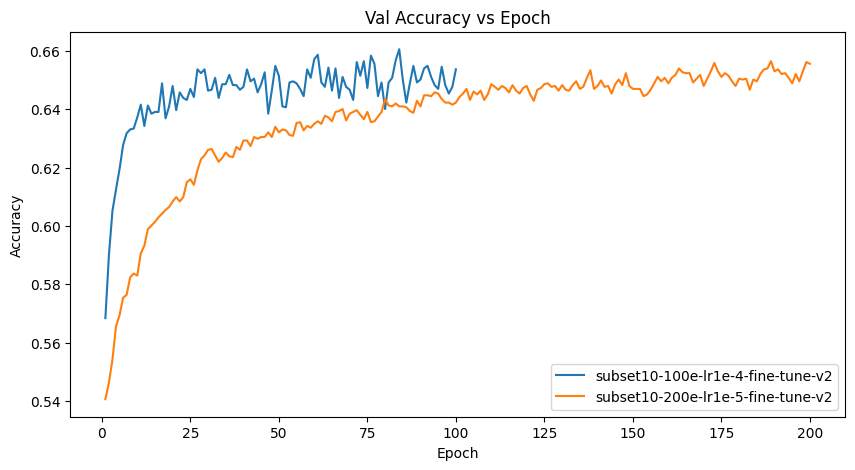

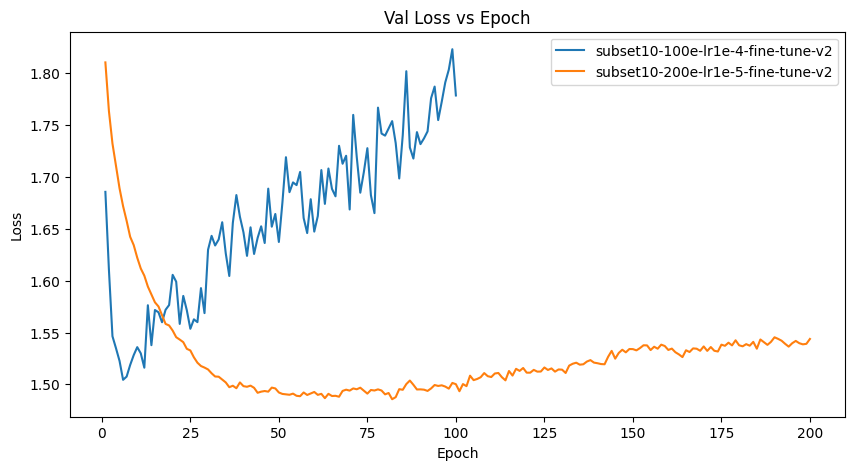

In [23]:
base_dir = 'results/two-stage/2-fine-tune-v2'
sub_dirs = [
    'subset10-100e-lr1e-4-fine-tune-v2',
    'subset10-200e-lr1e-5-fine-tune-v2',
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

## Train winning architecture experiment on entire dataset
Given that **single-stage fine-tuning** performed the best, we used this approach for training our final model on the **full** training dataset. We maintained the optimal learning rate of **1e-4** and allowed for **50 epochs** to accommodate the larger dataset size. The model achieved an impressive validation accuracy of **83.5%** at **epoch 20**.

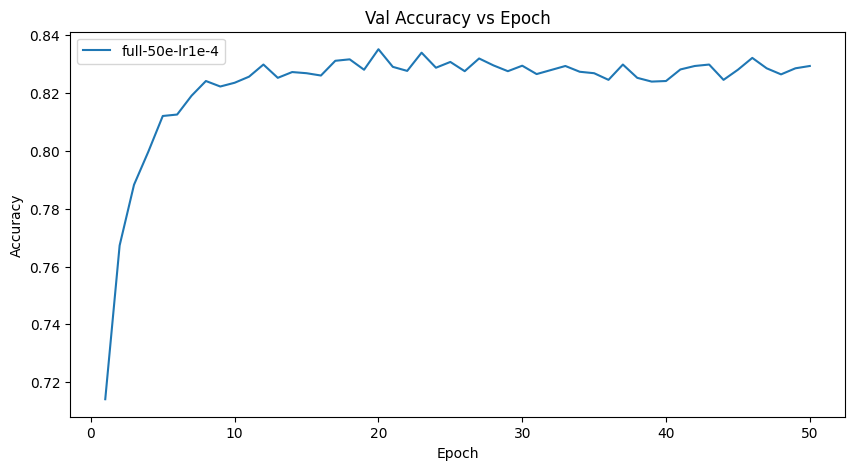

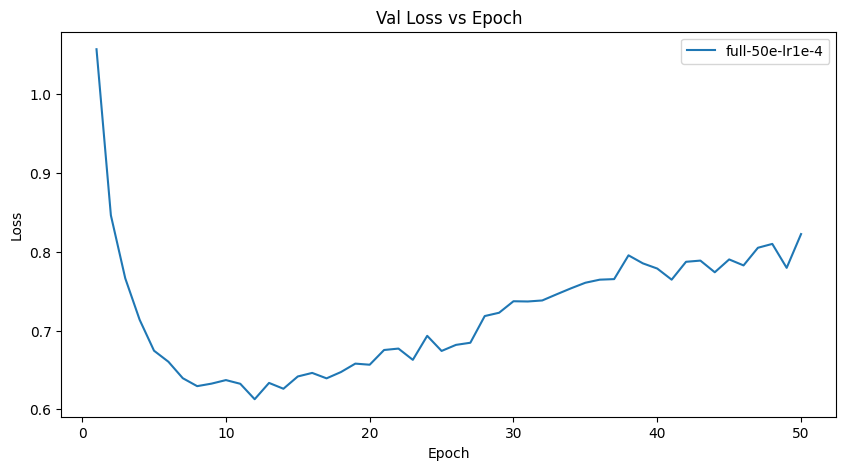

In [34]:
base_dir = 'results/final-model'
sub_dirs = [
    'full-50e-lr1e-4'
]
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='accuracy')
compare_plots(base_dir=base_dir, sub_dirs=sub_dirs, dataset='val', metric='loss')

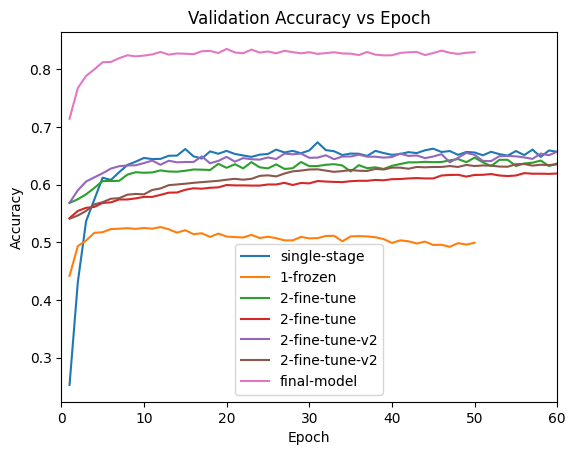

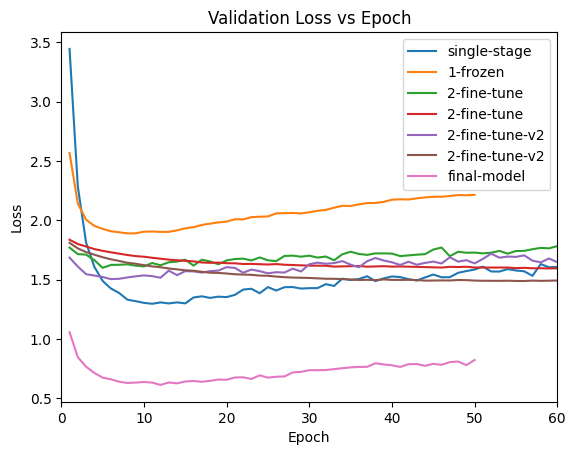

In [17]:
# Compare performance of all trained models
from src.vis_utils import read_history
import matplotlib.pyplot as plt
dirs = [
    'results/single-stage/subset10-100e-lr1e-4',
    'results/two-stage/1-frozen/subset10-50e-lr1e-3-frozen',
    'results/two-stage/2-fine-tune/subset10-100e-lr1e-4-fine-tune',
    'results/two-stage/2-fine-tune/subset10-150e-lr1e-5-fine-tune',
    'results/two-stage/2-fine-tune-v2/subset10-100e-lr1e-4-fine-tune-v2',
    'results/two-stage/2-fine-tune-v2/subset10-200e-lr1e-5-fine-tune-v2',
    'results/final-model/full-50e-lr1e-4',
]

for dir_ in dirs:
    filepath = os.path.join(dir_, 'val_history.txt')

    epoch, loss, acc = read_history(filepath)

    sub_dir = filepath.split('/')[-2]
    plt.plot(epoch, acc, label=f'{sub_dir}')
    ylabel = 'Accuracy'

plt.xlabel('Epoch')
plt.ylabel(ylabel)
plt.title(f'Validation {ylabel} vs Epoch')
plt.xlim([0, 60])
plt.legend()
plt.show()

for dir_ in dirs:
    filepath = os.path.join(dir_, 'val_history.txt')

    epoch, loss, acc = read_history(filepath)

    sub_dir = filepath.split('/')[-2]
    plt.plot(epoch, loss, label=f'{sub_dir}')
    ylabel = 'Loss'

plt.xlabel('Epoch')
plt.ylabel(ylabel)
plt.title(f'Validation {ylabel} vs Epoch')
plt.xlim([0, 60])
plt.legend()
plt.show()

## Evaluate trained model on test dataset
Finally, we evaluated our trained model on the test dataset, where it achieved a test accuracy of **82.9%**.

In [18]:
#############################################################################
# Evaluate: full-50e-lr1e-4
#############################################################################
!python main.py --dataset full --mode test --model_name full-50e-lr1e-4-eval --checkpoint_path checkpoint/full-50e-lr1e-4/best_model.pth.tar

Test loss: 0.6693 | Test acc: 0.8294


## Exploration
To conclude our evaluation of the model's performance, we conducted a deep dive into its classification results. We observed that the model achieved impressive accuracy in identifying food images despite facing several challenges related to Computer Vision, including varying illumination conditions, background clutter, and occlusion. These results highlight the robustness of the model for real-world scenarios.

To quantify our results, we computed the precision, recall, and F1-score for each class. We ranked class performance based on F1-score and examined the worst performing classes in more detail, which were steak, pork chop, apple pie, and bread pudding. Notably, these classes were often misidentified with one another. 

Our analysis revealed that the model faced notable challenges in distinguishing between visually similar food and navigating nuances in intra-class variation. For example, the model confused bread pudding for apple pie, which are visually similar food items that humans might also reasonably confuse with each other. The model also made mistakes such as misclassifying gnocchi as ravioli, and steak as filet mignon, which highlights limitations in the model's ability to interpret subtle differences between similar classes of food.

In [19]:
from src.mobilenet import *
from src.data_utils import *
from src.main import DEVICE, DTYPE, FOOD101_CLASSES, PRETRAINED_WEIGHTS_PATH, DATA_DIR
from src.train import get_predictions
from sklearn.metrics import classification_report

train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader = prepare_dataloaders(
        data_dir=DATA_DIR, 
        batch_size=64, 
        num_workers=0, 
        dataset_type='full'
)

model = MyMobileNet(
    output_classes=FOOD101_CLASSES, 
    device=DEVICE, 
    pretrained_weights_path=PRETRAINED_WEIGHTS_PATH, 
    checkpoint_path='checkpoint/final-model/full-50e-lr1e-4/best_model.pth.tar'
)

all_preds, all_labels = get_predictions(model, test_loader, device=DEVICE, dtype=DTYPE)

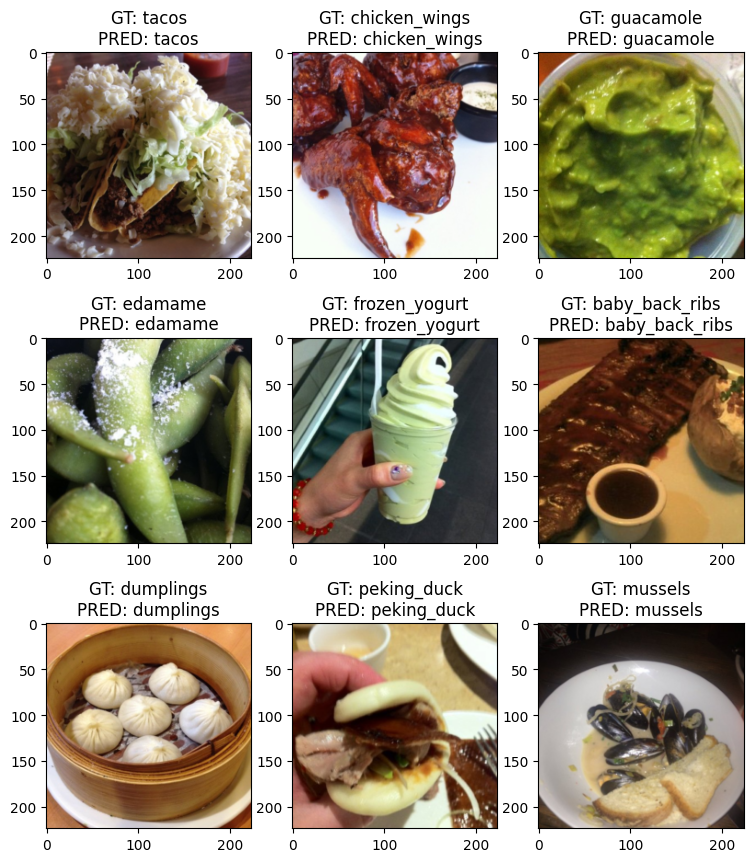

In [20]:
# Plot correctly classified images
from src.vis_utils import plot_classified_images, plot_class_predictions
plot_classified_images(all_labels, all_preds, test_loader, test_dataset, correct=True)

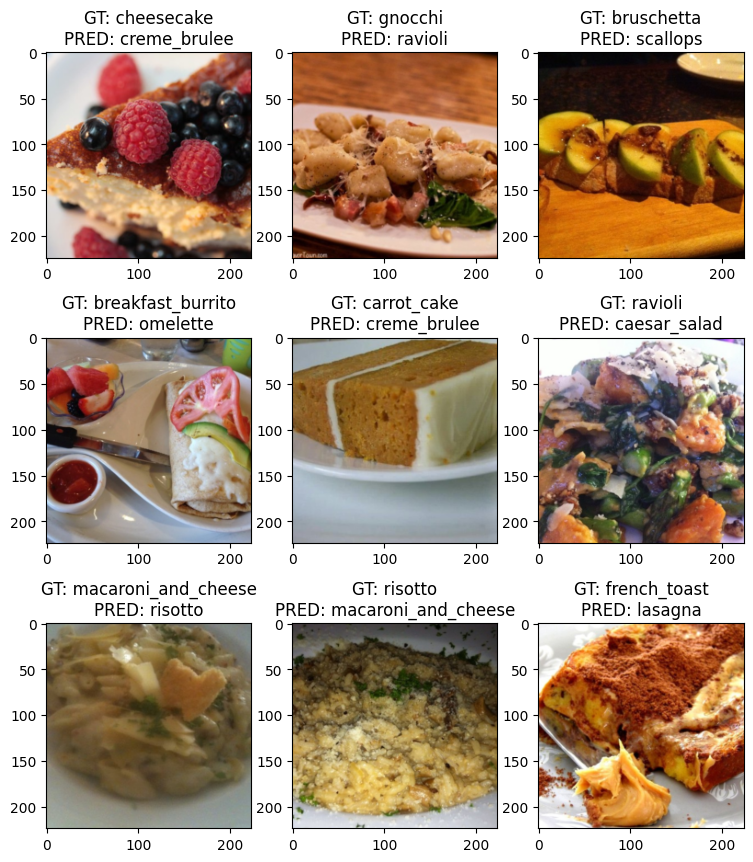

In [39]:
# Plot incorrectly classified images
plot_classified_images(all_labels, all_preds, test_loader, test_dataset, correct=False)

In [9]:
# Compute classification metrics for each class
report = classification_report(all_labels, all_preds)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       125
           1       0.89      0.72      0.80       125
           2       0.86      0.86      0.86       125
           3       0.89      0.87      0.88       125
           4       0.78      0.87      0.82       125
           5       0.75      0.74      0.74       125
           6       0.85      0.85      0.85       125
           7       0.95      0.97      0.96       125
           8       0.72      0.57      0.64       125
           9       0.85      0.66      0.74       125
          10       0.89      0.70      0.78       125
          11       0.80      0.90      0.85       125
          12       0.88      0.91      0.89       125
          13       0.88      0.86      0.87       125
          14       0.87      0.67      0.76       125
          15       0.73      0.76      0.75       125
          16       0.72      0.69      0.70       125
          17       0.92    

In [10]:
# Sort class performance by F1-score in ascending order
report = classification_report(all_labels, all_preds, output_dict=True)

f1_scores = []
for label, metrics in report.items():
    if label.isdigit():
        f1_scores.append((label, metrics['f1-score']))

f1_scores_sorted = sorted(f1_scores, key=lambda x: x[1])

for label, f1_score in f1_scores_sorted:
    print(f"Class {label} ({test_dataset.dataset.classes[int(label)]}): F1-score = {f1_score:.2f}")

Class 93 (steak): F1-score = 0.53
Class 77 (pork_chop): F1-score = 0.61
Class 0 (apple_pie): F1-score = 0.62
Class 8 (bread_pudding): F1-score = 0.64
Class 37 (filet_mignon): F1-score = 0.66
Class 22 (chocolate_mousse): F1-score = 0.67
Class 82 (ravioli): F1-score = 0.69
Class 39 (foie_gras): F1-score = 0.70
Class 16 (cheesecake): F1-score = 0.70
Class 49 (grilled_cheese_sandwich): F1-score = 0.72
Class 56 (huevos_rancheros): F1-score = 0.72
Class 21 (chocolate_cake): F1-score = 0.73
Class 99 (tuna_tartare): F1-score = 0.74
Class 5 (beet_salad): F1-score = 0.74
Class 26 (crab_cakes): F1-score = 0.74
Class 9 (breakfast_burrito): F1-score = 0.74
Class 15 (ceviche): F1-score = 0.75
Class 73 (panna_cotta): F1-score = 0.75
Class 50 (grilled_salmon): F1-score = 0.75
Class 87 (scallops): F1-score = 0.76
Class 96 (tacos): F1-score = 0.76
Class 14 (carrot_cake): F1-score = 0.76
Class 84 (risotto): F1-score = 0.76
Class 18 (chicken_curry): F1-score = 0.76
Class 58 (ice_cream): F1-score = 0.77
Cl

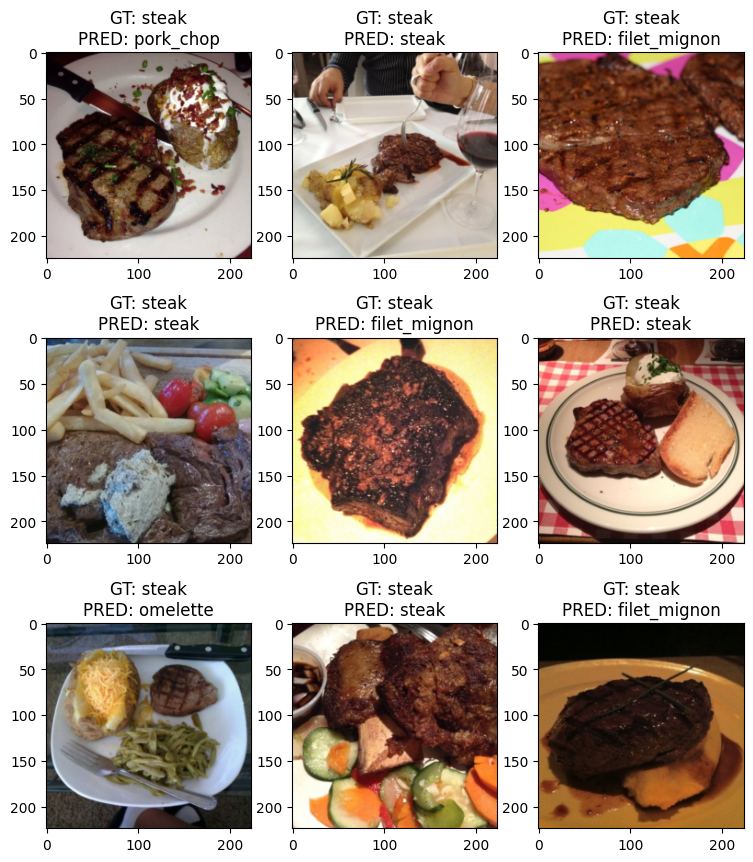

In [41]:
# Plot predictions for class 93 (steak)
plot_class_predictions(all_labels, all_preds, test_loader, test_dataset, 93)

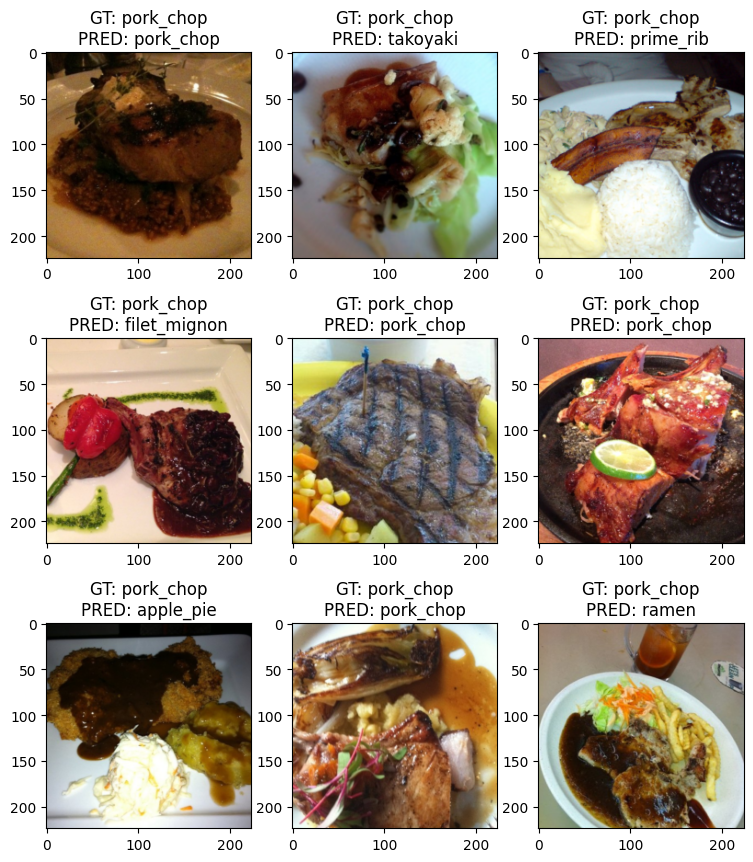

In [42]:
# Plot predictions for class 77 (pork chop)
plot_class_predictions(all_labels, all_preds, test_loader, test_dataset, 77)

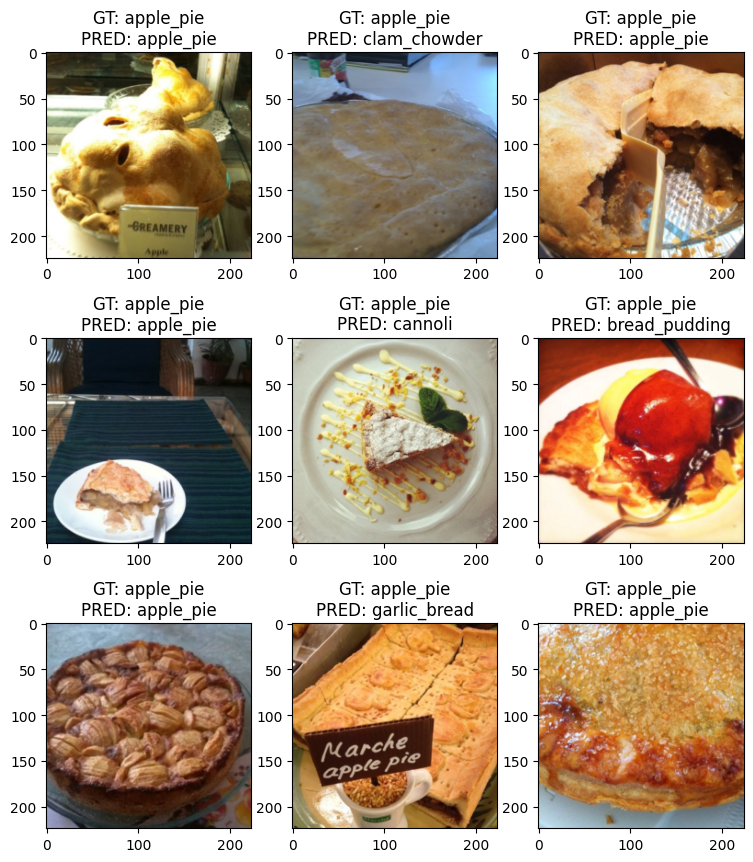

In [44]:
# Plot predictions for class 0 (apple pie)
plot_class_predictions(all_labels, all_preds, test_loader, test_dataset, 0)

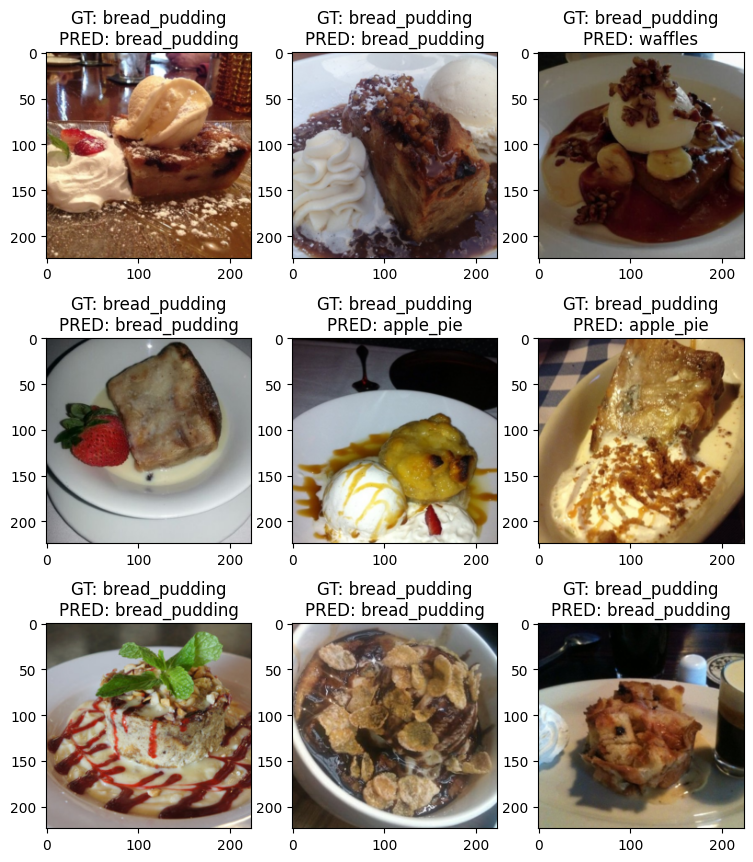

In [48]:
# Plot predictions for class 8 (bread pudding)
plot_class_predictions(all_labels, all_preds, test_loader, test_dataset, 8)

## Further Improvements
There are several areas we can explore for improvement in the future:

- **Finer Hyperparameter Optimisation:** Due to hardware limitations, we've opted for a coarse hyperparameter tuning process, leaving significant room for improvement in optimisation. By implementing more granular hyperparameter tuning, we could achieve better model performance and potentially obtain different experimental results.
- **Early Stopping:** Implementing an early stopping mechanism will make the training infrastructure more efficient and robust. By monitoring validation loss during training, we can halt the training process once the performance begins to degrade, thus mitigating against overfitting.
- **Learning Rate Scheduling:** Integrating a learning rate scheduling strategy into the training infrastructure could further optimise model performance. By dynamically adjusting the learning rate during training, we can mitigate against overfitting and facilitate a more effective convergence process.
- **More Diverse Image Augmentation**: Experimenting with a wider variety of data augmentation techniques can also help mitigate against overfitting and potentially improve model performance.
- **Deeper Exploration of Transfer Learning:** Further exploration of different transfer learning techniques could also enhance performance and lead to outperforming a single-stage fine-tuning approach. These could include more stages of freezing layers, using differential learning rates while training, or experimenting with different classification heads (to replace or add more layers to MobileNet).
- **Subset Selection Algorithms:** Instead of random subset selection, we could employ advanced subset selection algorithms, such as CRAIG, Grad-match, or GLISTER. These algorithms can help identify the most informative samples from the dataset, leading to improved training efficiency and model performance by focusing on high-quality, representative examples.